In [20]:
import numpy as np
import pandas as pd

In [21]:
news = pd.read_csv("News_dataset.csv")

In [22]:
news.shape

(1000, 6)

In [23]:
news['class'].value_counts()

class
0    1000
Name: count, dtype: int64

In [24]:
news.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [25]:
news = news.sample(frac=0.55)
news.reset_index(inplace=True)
news.shape

(550, 7)

In [26]:
news.head()

,index,Unnamed: 0,title,text,subject,date,class
0,793,793,"With Latest Hire, Trump Mightâ€™ve Just Gone ...","Trump s brand-new communications director, Ant...",News,"July 21, 2017",0
1,256,256,"SLC Cops Murder Crying Suspect, Shoot Him In ...","On Sunday, August 13th, Salt Lake City Police ...",News,"October 5, 2017",0
2,345,345,Trump Judicial Nominee: Transgender Children ...,Donald Trump s nominee for a federal judgeship...,News,"September 20, 2017",0
3,718,718,Scaramucciâ€™s New Yorker Interview Is More T...,Donald Trump s pick for Communications Directo...,News,"July 28, 2017",0
4,551,551,Former US Labor Secretary Has Dire Warning: T...,"To one former labor secretary, what Donald Tru...",News,"August 16, 2017",0


In [27]:
news['class'].value_counts()

class
0    550
Name: count, dtype: int64

In [28]:
news.drop(["index","subject","date","title"], axis=1, inplace=True)
news.drop(news.columns[news.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
news.head()

,text,class
0,"Trump s brand-new communications director, Ant...",0
1,"On Sunday, August 13th, Salt Lake City Police ...",0
2,Donald Trump s nominee for a federal judgeship...,0
3,Donald Trump s pick for Communications Directo...,0
4,"To one former labor secretary, what Donald Tru...",0


In [29]:
news['text'][0]

'Trump s brand-new communications director, Anthony Scaramucci, is raising some eyebrows, and not because he s another former Wall Streeter. He supported both Obama and Hillary, and has expressed some considerably liberal views on things like gun laws and the 2nd Amendment. That may well put Trump at war with the NRA, because the NRA is likely to see this as a betrayal of sorts.In 2012, Scaramucci was very clear in his position on gun laws, and they do not match what the NRA wants to see in the White House at all:Image via TwitterHe also told all of Twitter that he s always supported strong gun laws. The NRA hates any gun laws   in fact, they like to push lawmakers to loosen them in response to mass shootings:Image via TwitterSo, of course, NRA spokeswoman Dana Loesch isn t exactly thrilled with Scaramucci s appointment. She s hoping that he s changed his position since then, because, after all, the only things that matter to the NRA-types are guns. Lives? Safety? Well, those are just 

In [30]:
news['text'].iloc[:2]

0    Trump s brand-new communications director, Ant...
1    On Sunday, August 13th, Salt Lake City Police ...
Name: text, dtype: object

In [31]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [32]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        if isinstance(sentence, str):  # Ensure the item is a string
            # Remove punctuation
            sentence = re.sub(r'[^\w\s]', '', sentence)
            # Tokenize, convert to lowercase, and remove stopwords
            preprocessed_sentence = ' '.join(token.lower()
                                             for token in sentence.split()
                                             if token.lower() not in stopwords.words('english'))
            preprocessed_text.append(preprocessed_sentence)
        else:
            # Handle non-string items
            preprocessed_text.append('')

    return preprocessed_text

In [33]:
preprocessed_review = preprocess_text(news['text'].values)

100%|██████████| 550/550 [00:35<00:00, 15.46it/s]


In [34]:
news['text'] = preprocessed_review
type(news['text'])

pandas.core.series.Series

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

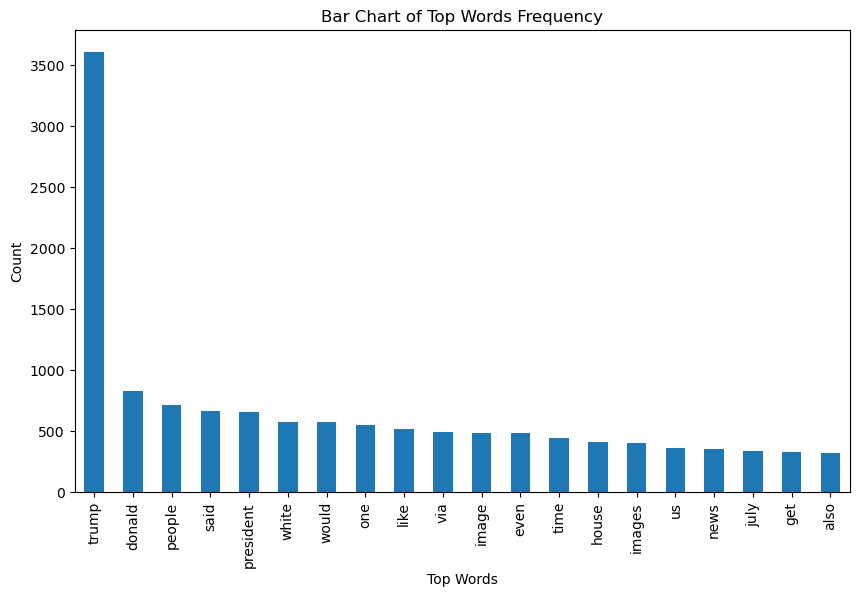

In [35]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(news['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(news['text'],
                                                    news['class'],
                                                    test_size=0.25)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [39]:
print(news['class'].value_counts())


class
0    550
Name: count, dtype: int64


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, model.predict(x_train)))
print("Testing Accuracy:", accuracy_score(y_test, model.predict(x_test)))


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [44]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Generate random predictions
np.random.seed(42)  # Ensure reproducibility
random_predictions = np.random.choice(a=[False, True], size=len(y_test))

# Compute confusion matrix
cm_random = metrics.confusion_matrix(y_test, random_predictions)

# Display confusion matrix
cm_display_random = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_random,
                                                   display_labels=[False, True])

# Set up a smaller figure
fig, ax = plt.subplots(figsize=(6, 6))  # Smaller figure size
cm_display_random.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Random Classifier")

# Save to file instead of showing
plt.savefig('random_classifier_cm.png')
plt.close()  # Close the figure


In [45]:
import pickle
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorization, vectorizer_file)
# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)